In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score


In [8]:
can=load_iris()
df=pd.DataFrame(can.data,columns=can.feature_names)
df['target']=can.target
df.sample(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
106,4.9,2.5,4.5,1.7,2
147,6.5,3.0,5.2,2.0,2
90,5.5,2.6,4.4,1.2,1


In [9]:
X=can.data[:,0:2]
y=can.target

0.8


<Axes: >

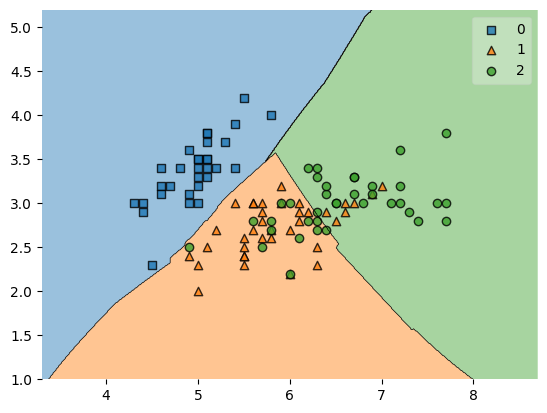

In [20]:
from sklearn.ensemble import StackingClassifier,RandomForestClassifier
X_train ,X_test,y_train, y_test =train_test_split(X,y,test_size=0.3,random_state=42)
base_models=[
    ('model1',LogisticRegression()),
    ('model2',DecisionTreeClassifier()),
    ('model3',SVC())
]

meta_model=RandomForestClassifier(max_depth=2)

model=StackingClassifier(estimators=base_models,final_estimator=meta_model,cv=5)

model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_test,y_pred))

plot_decision_regions(X_train,y_train,clf=model)